In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
print("TensorFlow", tf.__version__)


TensorFlow 2.19.0


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
# Normalize and reshape for Keras (channels_last)
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)  # (N,28,28,1)
x_test  = np.expand_dims(x_test, -1)
print(x_train.shape, y_train.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28, 1) (60000,)


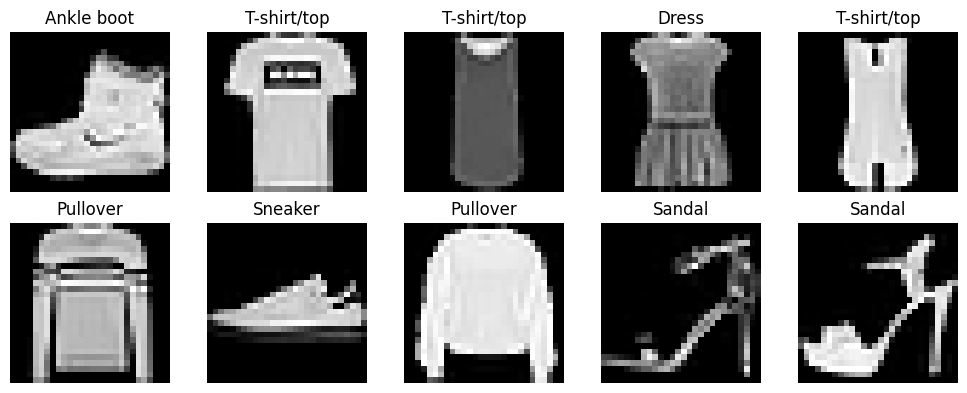

In [3]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()


In [4]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42, stratify=y_train)
print(x_tr.shape, x_val.shape)


(54000, 28, 28, 1) (6000, 28, 28, 1)


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.08,
    height_shift_range=0.08,
    shear_range=0.1,
    zoom_range=0.08
)
datagen.fit(x_tr)


In [6]:
def make_model(input_shape=(28,28,1), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = make_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,378 (774.91 KB)

 Trainable params: 197,930 (773.16 KB)

 Non-trainable params: 448 (1.75 KB)

In [7]:
callbacks = [
    keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_accuracy", mode="max"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
]


In [8]:
BATCH = 64
EPOCHS = 15   # adjust; 10-15 is usually enough
history = model.fit(
    datagen.flow(x_tr, y_tr, batch_size=BATCH),
    steps_per_epoch=len(x_tr)//BATCH,
    epochs=EPOCHS,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


842/843 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6603 - loss: 0.9715

843/843 ━━━━━━━━━━━━━━━━━━━━ 35s 31ms/step - accuracy: 0.6605 - loss: 0.9709 - val_accuracy: 0.8412 - val_loss: 0.4277
Epoch 2/15
  1/843 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8281 - loss: 0.4976

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


843/843 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - accuracy: 0.8281 - loss: 0.4976 - val_accuracy: 0.8440 - val_loss: 0.4260
Epoch 3/15
843/843 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8102 - loss: 0.5127

843/843 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.8103 - loss: 0.5126 - val_accuracy: 0.8602 - val_loss: 0.3663
Epoch 4/15
  1/843 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8438 - loss: 0.3989

843/843 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - accuracy: 0.8438 - loss: 0.3989 - val_accuracy: 0.8665 - val_loss: 0.3601
Epoch 5/15
842/843 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8348 - loss: 0.4478

843/843 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.8348 - loss: 0.4478 - val_accuracy: 0.8768 - val_loss: 0.3444
Epoch 6/15
  1/843 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8281 - loss: 0.4811

843/843 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step - accuracy: 0.8281 - loss: 0.4811 - val_accuracy: 0.8773 - val_loss: 0.3443
Epoch 7/15
842/843 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8519 - loss: 0.4065

843/843 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.8519 - loss: 0.4064 - val_accuracy: 0.8925 - val_loss: 0.2934
Epoch 8/15
  1/843 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7969 - loss: 0.4539

843/843 ━━━━━━━━━━━━━━━━━━━━ 1s 662us/step - accuracy: 0.7969 - loss: 0.4539 - val_accuracy: 0.8962 - val_loss: 0.2806
Epoch 9/15
842/843 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8611 - loss: 0.3749

843/843 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.8611 - loss: 0.3749 - val_accuracy: 0.8997 - val_loss: 0.2695
Epoch 10/15
843/843 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - accuracy: 0.9219 - loss: 0.2415 - val_accuracy: 0.8973 - val_loss: 0.2761
Epoch 11/15
843/843 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.8678 - loss: 0.3602 - val_accuracy: 0.8970 - val_loss: 0.2813
Epoch 12/15
843/843 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 0.8125 - loss: 0.4731 - val_accuracy: 0.8960 - val_loss: 0.2826
Epoch 13/15
843/843 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.8727 - loss: 0.3425 - val_accuracy: 0.8993 - val_loss: 0.2801
Epoch 14/15
843/843 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.8281 - loss: 0.4843 - val_accuracy: 0.8995 - val_loss: 0.2800


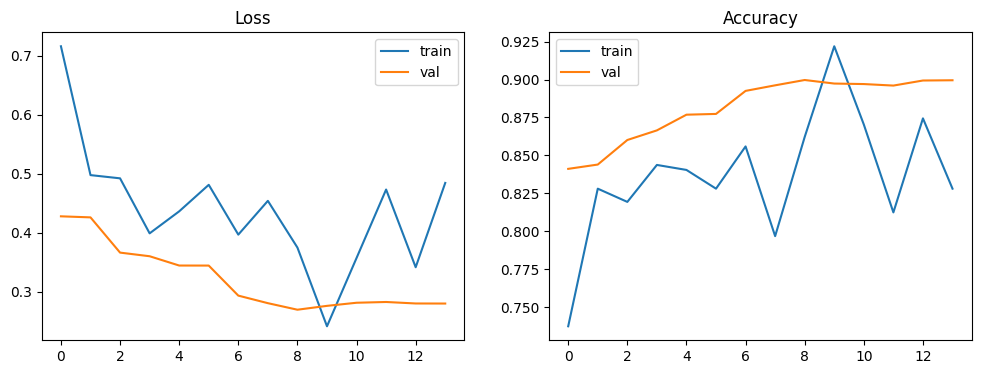

In [9]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.plot(history.history['loss'], label='train'); plt.plot(history.history['val_loss'], label='val'); plt.title('Loss'); plt.legend()
plt.subplot(1,2,2); plt.plot(history.history['accuracy'], label='train'); plt.plot(history.history['val_accuracy'], label='val'); plt.title('Accuracy'); plt.legend()
plt.show()


In [10]:
model.load_weights("best_model.h5")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)


313/313 - 1s - 3ms/step - accuracy: 0.8901 - loss: 0.2944
Test accuracy: 0.8901000022888184


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.82      0.83      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.89      0.83      0.86      1000
       Dress       0.91      0.90      0.90      1000
        Coat       0.84      0.82      0.83      1000
      Sandal       0.92      1.00      0.95      1000
       Shirt       0.65      0.71      0.68      1000
     Sneaker       0.94      0.92      0.93      1000
         Bag       0.97      0.99      0.98      1000
  Ankle boot       0.99      0.93      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



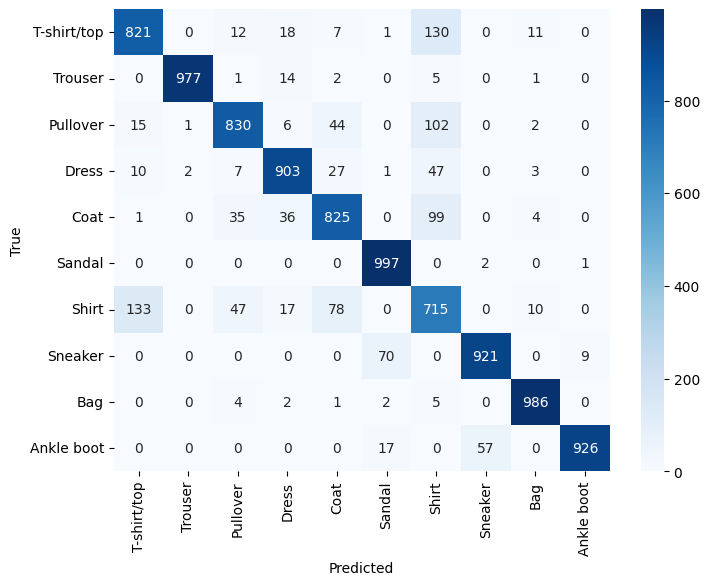

In [11]:
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.ylabel('True'); plt.xlabel('Predicted'); plt.show()


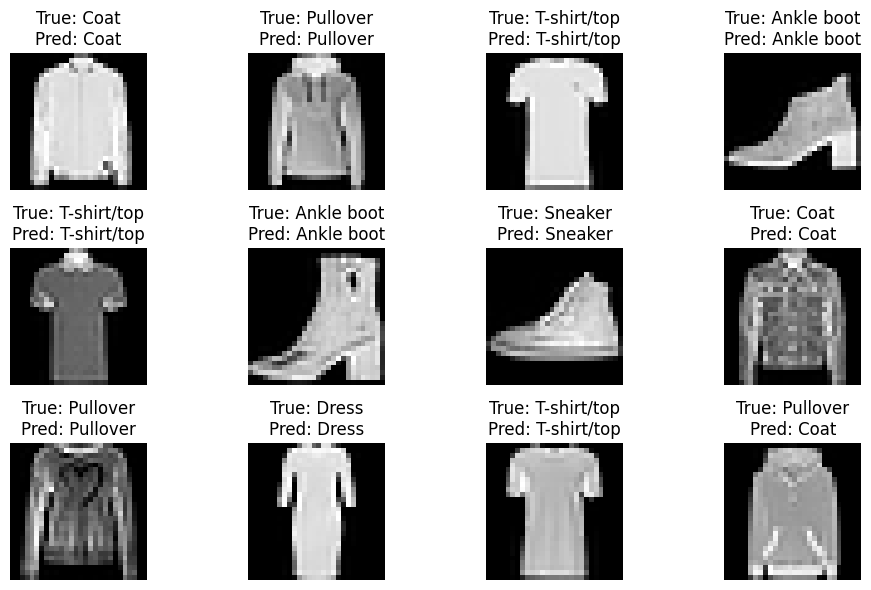

In [12]:
plt.figure(figsize=(10,6))
for i in range(12):
    plt.subplot(3,4,i+1)
    idx = np.random.randint(0, x_test.shape[0])
    plt.imshow(x_test[idx].squeeze(), cmap='gray')
    plt.title(f"True: {class_names[y_test[idx]]}\nPred: {class_names[y_pred[idx]]}")
    plt.axis('off')
plt.tight_layout()


In [ ]:
model.save("fashion_mnist_cnn.keras")
